# **Taller 2**

* Nicolas Rozo Fajardo - 202112920
* Santiago Martínez Novoa - 202112020

# **1. Calibración del histograma (o expansión de contraste)**

In [62]:
import matplotlib.pyplot as plt
from skimage import exposure
from scipy.stats import norm
import numpy as np
import cv2

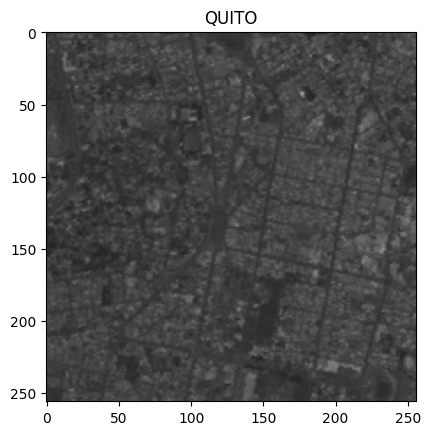

In [63]:
quito_image = cv2.imread("../images/quito.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(quito_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("QUITO")

plt.show()

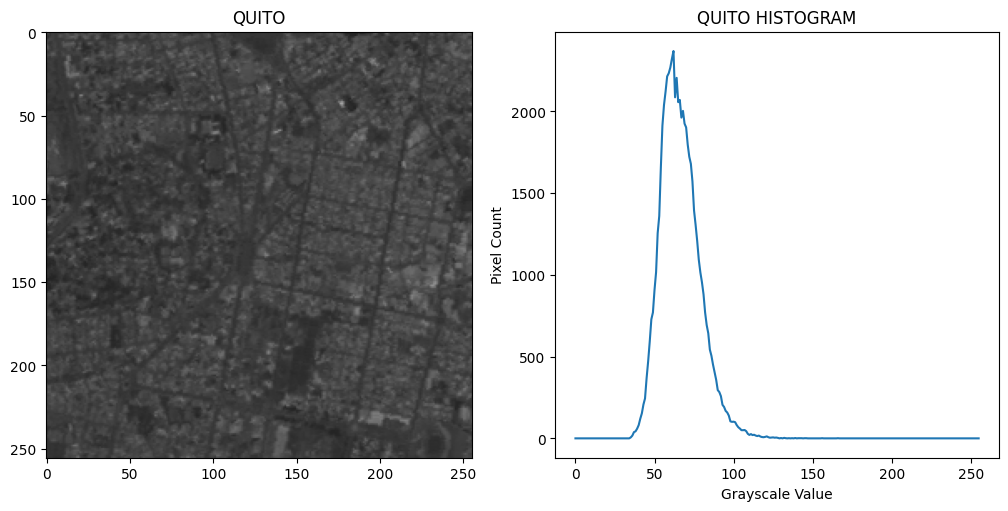

In [64]:
hist_quito = cv2.calcHist([quito_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(quito_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("QUITO")

ax[1].plot(hist_quito)
ax[1].set_title("QUITO HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Cuáles son los niveles de gris mínimo y máximo?

El histograma de la imagen muestra una distribución unimodal, es decir que solo hay un pico en el histograma. La mayoría de los píxeles tienen un valor de gris entre 30 y 110, esto indica que la imagen tiene un rango de contraste limitado y que la imagen en general es bastante oscura. El mayor pico del histograma se encuentra entre el rango de 60-70 de intensidad aproximadamente.

Observando el histograma, se puede determinar que el nivel de gris mínimo es aproximadamente 30-40, mientras que el nivel de gris máximo es aproximadamente 150-160 que es donde el histograma vuelve a tener un valor de cero.

In [65]:
min_value = quito_image.min()
max_value = quito_image.max()

print(f"Nivel de gris mínimo: {min_value}")
print(f"Nivel de gris máximo: {max_value}")

Nivel de gris mínimo: 35
Nivel de gris máximo: 166


Luego de buscar el nivel de gris mínimo y máximo exacto, se encontró que el nivel de gris mínimo es 35 y el nivel de gris máximo es 166.

In [66]:
rescaled_quito_image = exposure.rescale_intensity(quito_image, in_range = (min_value, max_value), out_range = (0, 255)).astype("uint8")

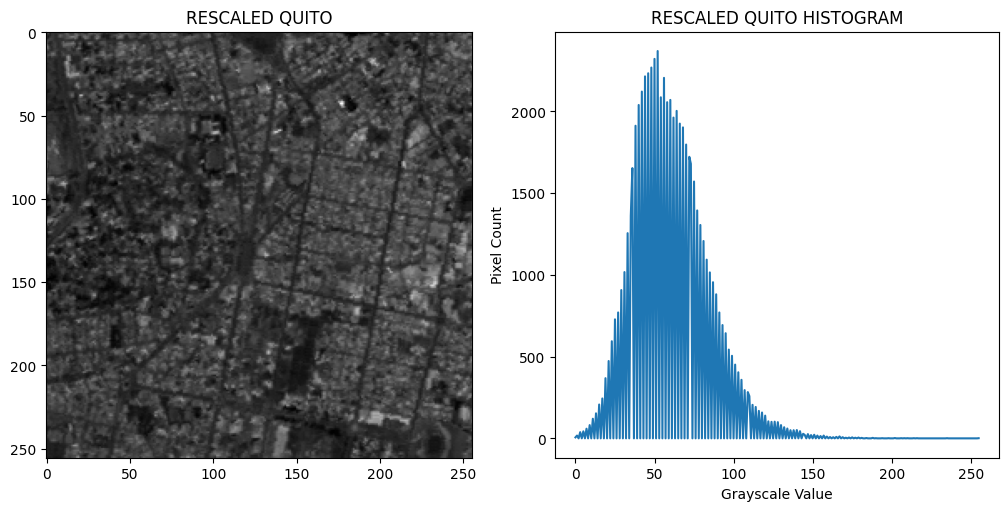

In [67]:
hist_quito_rescaled = cv2.calcHist([rescaled_quito_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(rescaled_quito_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("RESCALED QUITO")

ax[1].plot(hist_quito_rescaled)
ax[1].set_title("RESCALED QUITO HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿En qué consiste la mejora de la imagen?

La mejora es clara tanto en la comparación de las imágenes como en los histogramas. La mejora consiste en distribuir los valores de intensidad a lo largo de todo el rango disponible [0, 255] sobre todo parece aprovecharse mucho más el rango  de intensidades entre 0 y 180, amplificando las diferencias entre regiones claras y oscuras, lo que resulta en una imagen con mejor contraste y mayor definición de detalles.

In [68]:
min_value_1 = 50
max_value_1 = 100

rescaled_quito_image_1 = exposure.rescale_intensity(quito_image, in_range = (min_value_1, max_value_1), out_range = (0, 255)).astype("uint8")
hist_quito_rescaled_1 = cv2.calcHist([rescaled_quito_image_1], [0], None, [256], [0, 256])

min_value_2 = 40
max_value_2 = 120

rescaled_quito_image_2 = exposure.rescale_intensity(quito_image, in_range = (min_value_2, max_value_2), out_range = (0, 255)).astype("uint8")
hist_quito_rescaled_2 = cv2.calcHist([rescaled_quito_image_2], [0], None, [256], [0, 256])

min_value_3 = 35
max_value_3 = 166

rescaled_quito_image_3 = exposure.rescale_intensity(quito_image, in_range = (min_value_3, max_value_3), out_range = (0, 255)).astype("uint8")
hist_quito_rescaled_3 = cv2.calcHist([rescaled_quito_image_3], [0], None, [256], [0, 256])

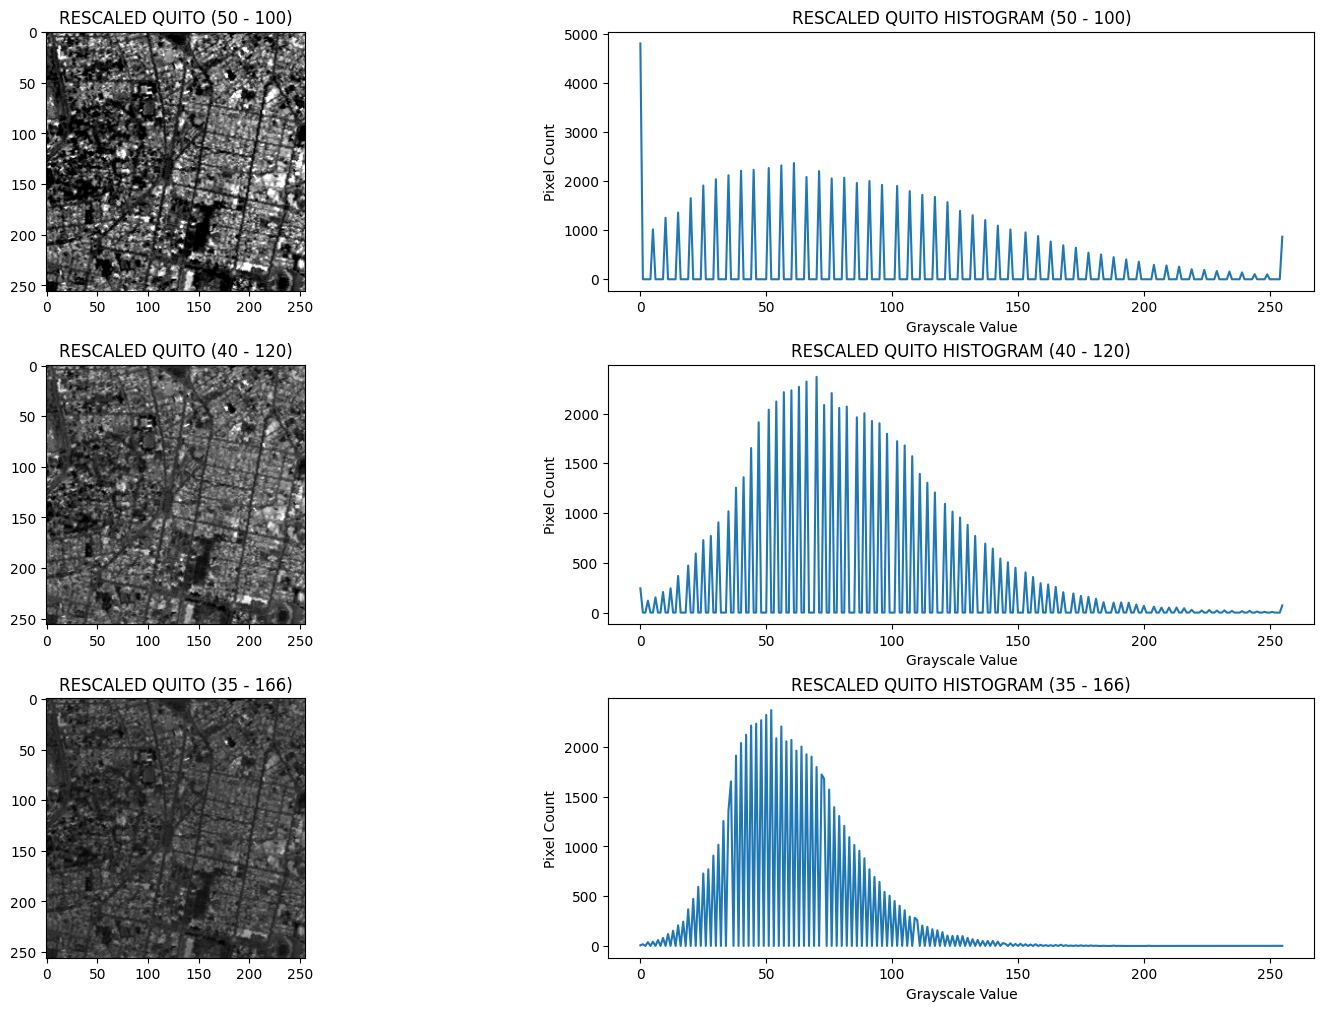

In [69]:
fig, ax = plt.subplots(3, 2, layout = "constrained", figsize = (15, 10))

ax[0, 0].imshow(rescaled_quito_image_1, cmap = "gray", vmin = 0, vmax = 255)
ax[0, 0].set_title("RESCALED QUITO (50 - 100)")

ax[0, 1].plot(hist_quito_rescaled_1)
ax[0, 1].set_title("RESCALED QUITO HISTOGRAM (50 - 100)")
ax[0, 1].set_xlabel("Grayscale Value")
ax[0, 1].set_ylabel("Pixel Count")

ax[1, 0].imshow(rescaled_quito_image_2, cmap = "gray", vmin = 0, vmax = 255)
ax[1, 0].set_title("RESCALED QUITO (40 - 120)")

ax[1, 1].plot(hist_quito_rescaled_2)
ax[1, 1].set_title("RESCALED QUITO HISTOGRAM (40 - 120)")
ax[1, 1].set_xlabel("Grayscale Value")
ax[1, 1].set_ylabel("Pixel Count")

ax[2, 0].imshow(rescaled_quito_image_3, cmap = "gray", vmin = 0, vmax = 255)
ax[2, 0].set_title("RESCALED QUITO (35 - 166)")

ax[2, 1].plot(hist_quito_rescaled_3)
ax[2, 1].set_title("RESCALED QUITO HISTOGRAM (35 - 166)")
ax[2, 1].set_xlabel("Grayscale Value")
ax[2, 1].set_ylabel("Pixel Count")

plt.show()

## ¿Cuál es la diferencia entre estas imágenes?

Las tres imágenes difieren en el rango de intensidades que se mapea al espectro completo de 0 a 255. La primera imagen mapea únicamente el rango 50-100, es decir, solo 50 niveles de gris originales se distribuyen en los 256 niveles disponibles, lo que produce un contraste excesivo que resulta también en pérdida de información por saturación como se puede observar en la frecuencia de las intensidades de 0 y 255 en el histograma. 

La segunda imagen mapea el rango 40-120, abarcando 80 niveles originales y generando un contraste moderado con mejor balance visual. 

La tercera imagen mapea el rango 35-166, que corresponde a los 131 niveles originales que se habían identificado anteriormente y produce un contraste más suave y cuya distribución de intensidades sigue siendo bastante restrictiva. En esta imagen no hay nada de saturación.


## ¿Cuál presenta el mejor contraste?

La imagen con el rango 50-100 definitivamente presenta el mayor contraste entre las tres versiones, dado que estira únicamente 50 niveles de gris al rango completo de 256 valores. Esto maximiza las diferencias entre píxeles adyacentes al aplicar una pendiente más pronunciada en la transformación lineal. Sin embargo, es importante notar que tener un mayor contraste causa efectos no deseados como saturación y pérdida de información en los extremos de intensidad.





## ¿Cuál permite ver mejor los detalles?

La imagen con el rango 40-120 permite visualizar mejor los detalles de la fotografía de Quito. Aunque la imagen 50-100 presenta mayor contraste, este resulta excesivo y causa pérdida de información pues zonas que deberían tener diferentes intensidades se colapsan en negro o blanco puro. El rango 40-120 logra el balance adecuado entre amplificación del contraste (el cual es más alto que la del rango 35-166) y preservación de detalles sin caer en un montón de saturación en los extremos.





## ¿Por qué (35-166) da el mismo resultado que el punto 4?

El rango 35-166 produce el mismo resultado que la expansión de contraste del punto 4 porque estos valores coinciden precisamente con los niveles mínimo y máximo reales que se habían estimado inicialmente de manera visual con el histograma y luego calculados numéricamente con las funciones np.min() y np.max() presentes en la imagen original de Quito. El rango resultó siendo exactamente 35-166, por lo que ambos métodos terminan aplicando la misma transformación lineal.





## Conclusión

La expansión de contraste es una técnica efectiva para mejorar la visualización de imágenes al distribuir los valores de intensidad a lo largo del rango completo disponible de 0 a 255, teniendo la posibilidad de ajustar estos valores de manera precisa dependiendo de las características de la imagen y los objetivos de visualización. Sin embargo, la experimentación con diferentes rangos de entrada demuestra que la selección de estos límites es un factor crítico para obtener resultados correctos. Utilizar el rango real de la imagen, calculado mediante los valores mínimo y máximo observados, preserva toda la información disponible y maximiza el contraste sin introducir artefactos artificiales. Por el contrario, rangos unpoco más restrictivos pueden producir un contraste artificial excesivo que resulta en pérdida de información que dependiendo de la imagen puede ser crucial. El análisis comparativo revela que el mejor contraste y el que permite ver de mejor manera los detalles no es necesariamente el más extremo, sino aquel que balancea adecuadamente la amplificación de diferencias entre píxeles con la preservación de la información original de la imagen.

# **2. Ecualización del histograma**

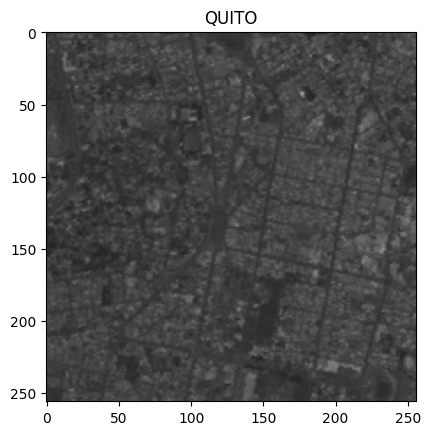

In [70]:
quito_image = cv2.imread("../images/quito.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(quito_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("QUITO")

plt.show()

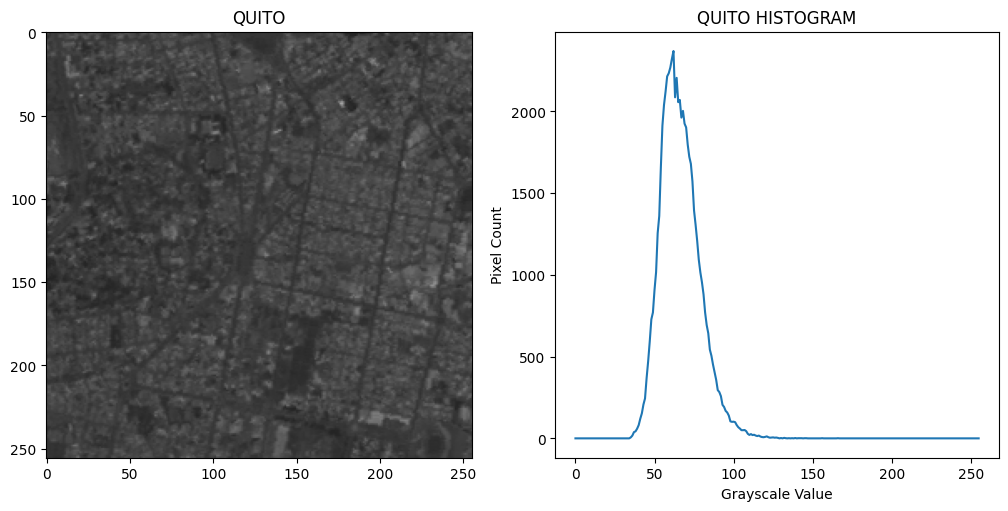

In [71]:
hist_quito = cv2.calcHist([quito_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(quito_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("QUITO")

ax[1].plot(hist_quito)
ax[1].set_title("QUITO HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

In [72]:
equalized_quito_image_1 = cv2.equalizeHist(quito_image)

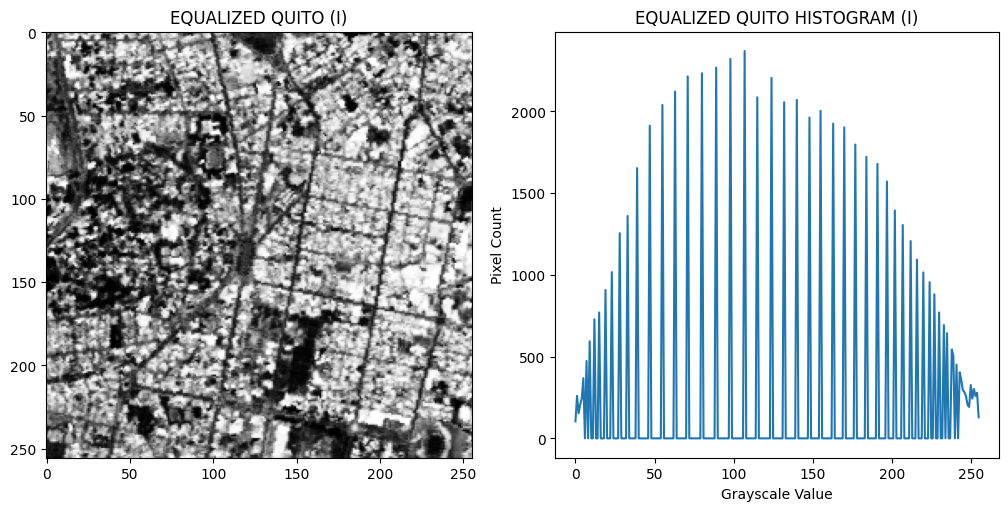

In [73]:
hist_equalized_quito_1 = cv2.calcHist([equalized_quito_image_1], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(equalized_quito_image_1, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("EQUALIZED QUITO (I)")

ax[1].plot(hist_equalized_quito_1)
ax[1].set_title("EQUALIZED QUITO HISTOGRAM (I)")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿A qué se debe la discontinuidad del histograma ecualizado?

La discontinuidad observada en el histograma ecualizado se debe a la naturaleza concentrada del histograma original de la imagen de Quito. El histograma original presentaba un pico muy pronunciado alrededor de los valores 75-80, indicando que la gran mayoría de los píxeles se concentraban en un rango estrecho de intensidades, mientras que había muy pocos píxeles en los extremos del espectro. Al aplicar la ecualización del histograma, el algoritmo utiliza la función de distribución acumulativa como transformación, intentando redistribuir los píxeles uniformemente a lo largo del rango completo de 0 a 255. Sin embargo, dado que el histograma original tenía regiones con muy pocos o ningún píxel, no hay valores que mapear a ciertos bins del histograma ecualizado, resultando en barras discontinuas o ausentes. Esta discontinuidad es inherente a la técnica cuando se aplica sobre imágenes con distribuciones muy concentradas o con "huecos" en su histograma original. El efecto se manifiesta visualmente en la imagen ecualizada como un contraste extremadamente alto, casi binario, donde se pierden detalles sutiles y aparecen zonas saturadas en negro y blanco puro, evidenciando que la ecualización del histograma no siempre produce resultados visuales superiores, especialmente en imágenes con distribuciones de intensidad muy sesgadas.

In [74]:
equalized_quito_image_2 = cv2.equalizeHist(equalized_quito_image_1)

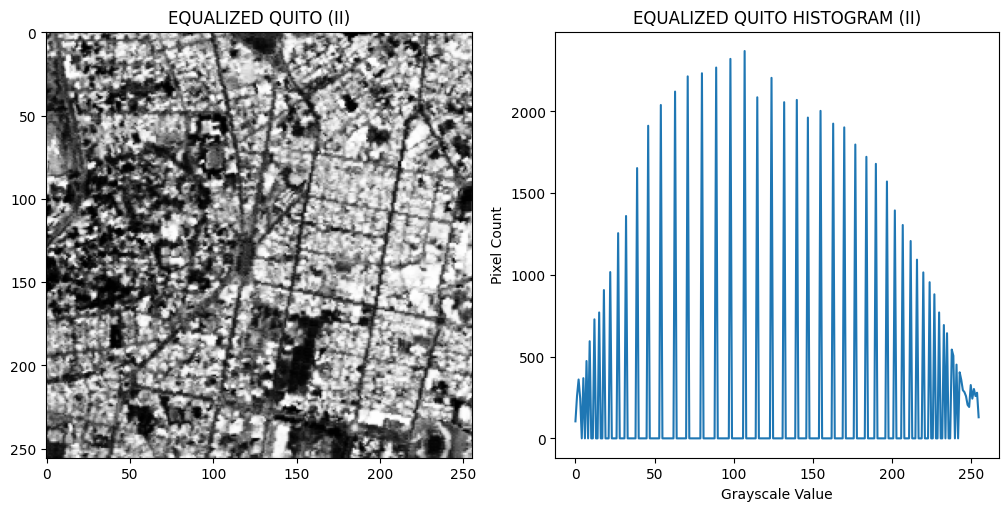

In [75]:
hist_equalized_quito_2 = cv2.calcHist([equalized_quito_image_2], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(equalized_quito_image_2, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("EQUALIZED QUITO (II)")

ax[1].plot(hist_equalized_quito_2)
ax[1].set_title("EQUALIZED QUITO HISTOGRAM (II)")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Qué pasa después de correr nuevamente otra ecualización del histograma? ¿Por qué?
Al aplicar una segunda ecualización del histograma sobre la imagen ya ecualizada, se observa que tanto la imagen como su histograma permanecen prácticamente sin cambios respecto a la primera ecualización. Este comportamiento se debe a la propiedad de cuasi-idempotencia del algoritmo de ecualización del histograma. Después de la primera aplicación, el histograma de la imagen ya presenta una distribución aproximadamente uniforme, que es precisamente el objetivo de la técnica. Al calcular la función de distribución acumulativa de un histograma que ya es relativamente uniforme, se obtiene una transformación prácticamente lineal, similar a la función identidad, que no introduce modificaciones significativas en los valores de intensidad de los píxeles.

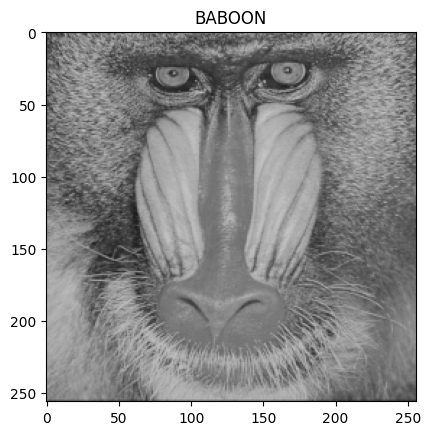

In [76]:
baboon_image = cv2.imread("../images/baboon.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(baboon_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("BABOON")

plt.show()

In [77]:
hist_baboon = cv2.calcHist([baboon_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(baboon_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("BABOON")

ax[1].plot(hist_baboon)
ax[1].set_title("BABOON HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

In [78]:
equalized_baboon_image = cv2.equalizeHist(baboon_image)	

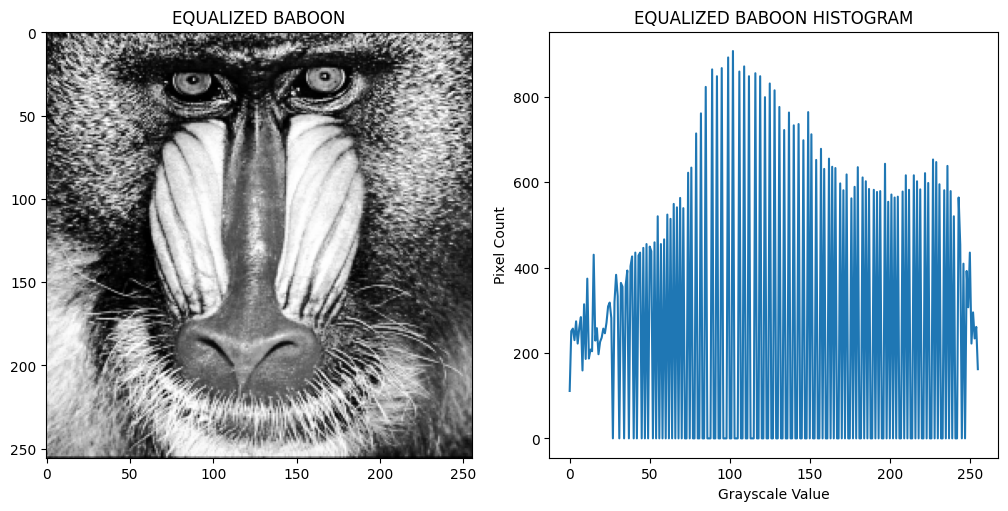

In [79]:
hist_equalized_baboon = cv2.calcHist([equalized_baboon_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(equalized_baboon_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("EQUALIZED BABOON")

ax[1].plot(hist_equalized_baboon)
ax[1].set_title("EQUALIZED BABOON HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()


## ¿Cómo es el resultado de esta transformación comparado con la ecualización de la imagen precedente (quito.png)? ¿Por qué?

El resultado de la ecualización del histograma aplicada a la imagen del babuino es significativamente superior al obtenido con la imagen de Quito. La imagen ecualizada del babuino preserva detalles finos, mantiene la estructura facial visible y presenta un contraste natural, mientras que la ecualización de Quito produjo contraste excesivo, pérdida de detalles y saturación en los extremos.

Esta diferencia se debe a las características de los histogramas originales. Quito presentaba una distribución extremadamente concentrada con un pico pronunciado alrededor de 75-80 y pocos píxeles en el resto del espectro, lo que genera una transformación discontinua con gaps en el histograma ecualizado. En contraste, el babuino tiene un histograma original más distribuido y gradual a lo largo del espectro, produciendo una transformación más suave que preserva las relaciones de intensidad entre píxeles adyacentes. El histograma ecualizado del babuino muestra una distribución continua y uniforme, sin los gaps pronunciados observados en Quito. Esto confirma que la ecualización produce mejores resultados cuando el histograma original ya presenta cierta distribución amplia, mientras que en imágenes con histogramas muy concentrados, técnicas como el contrast stretching lineal resultan más adecuadas.

# **3. Comparación entre diferentes transformaciones del histograma**

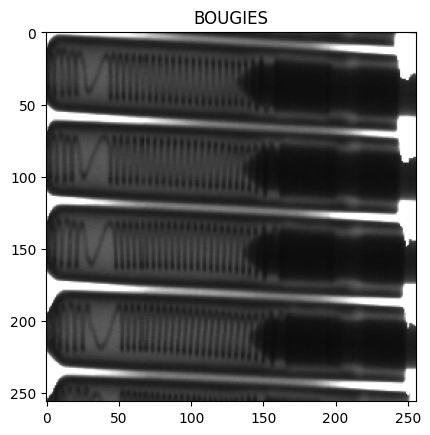

In [80]:
bougies_image = cv2.imread("../images/bougies.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("BOUGIES")

plt.show()

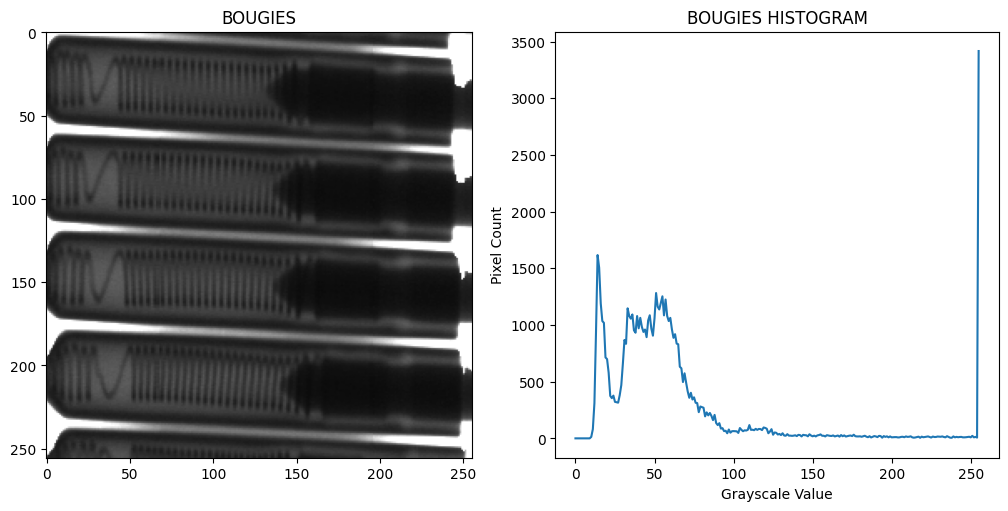

In [81]:
hist_bougies = cv2.calcHist([bougies_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("BOUGIES")

ax[1].plot(hist_bougies)
ax[1].set_title("BOUGIES HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

In [82]:
min_value = bougies_image.min()
max_value = bougies_image.max()

rescaled_bougies_image = exposure.rescale_intensity(bougies_image, in_range = (min_value, max_value), out_range = (0, 255)).astype("uint8")
hist_bougies_rescaled = cv2.calcHist([rescaled_bougies_image], [0], None, [256], [0, 256])

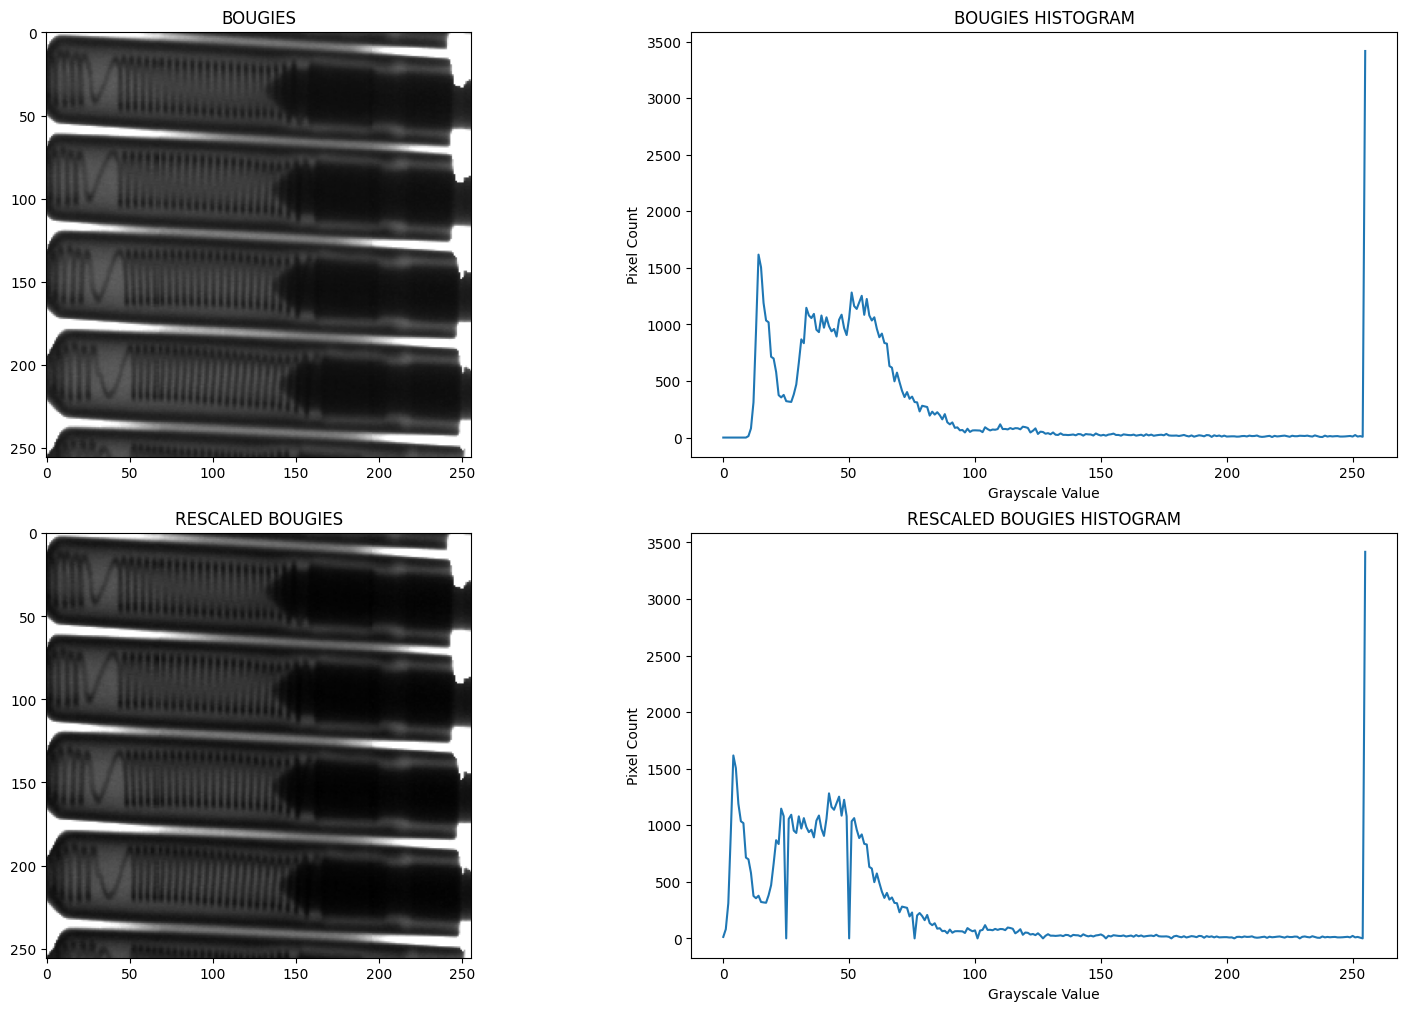

In [83]:
fig, ax = plt.subplots(2, 2, layout = "constrained", figsize = (15, 10))

ax[0, 0].imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0, 0].set_title("BOUGIES")

ax[0, 1].plot(hist_bougies)
ax[0, 1].set_title("BOUGIES HISTOGRAM")
ax[0, 1].set_xlabel("Grayscale Value")
ax[0, 1].set_ylabel("Pixel Count")

ax[1, 0].imshow(rescaled_bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[1, 0].set_title("RESCALED BOUGIES")

ax[1, 1].plot(hist_bougies_rescaled)
ax[1, 1].set_title("RESCALED BOUGIES HISTOGRAM")
ax[1, 1].set_xlabel("Grayscale Value")
ax[1, 1].set_ylabel("Pixel Count")

plt.show()

## ¿A qué se debe este resultado al aplicar una expansión de contraste?

La imagen original de las bujías presenta un histograma altamente sesgado hacia los valores bajos (oscuros), con un pico enorme en 255 (blanco puro) que corresponde al fondo. Después de la expansión del contraste mediante rescaling, la imagen y el histograma se mantienen prácticamente idénticos.

Este resultado se debe a que la imagen original ya utiliza casi todo el rango dinámico disponible, desde valores cercanos a 0 hasta 255. Al aplicar rescaling con el rango min-max real, la transformación lineal resulta prácticamente en una función identidad, ya que no hay espacio para "estirar" el contraste. El pico masivo en 255 domina completamente la distribución, indicando que gran parte de la imagen corresponde al fondo blanco, mientras que las bujías ocupan la región oscura del espectro. Esta estructura bimodal extrema (objeto oscuro sobre fondo brillante) limita la efectividad del rescaling lineal.

In [84]:
equalized_bougies_image = cv2.equalizeHist(bougies_image)
hist_equalized_bougies = cv2.calcHist([equalized_bougies_image], [0], None, [256], [0, 256])

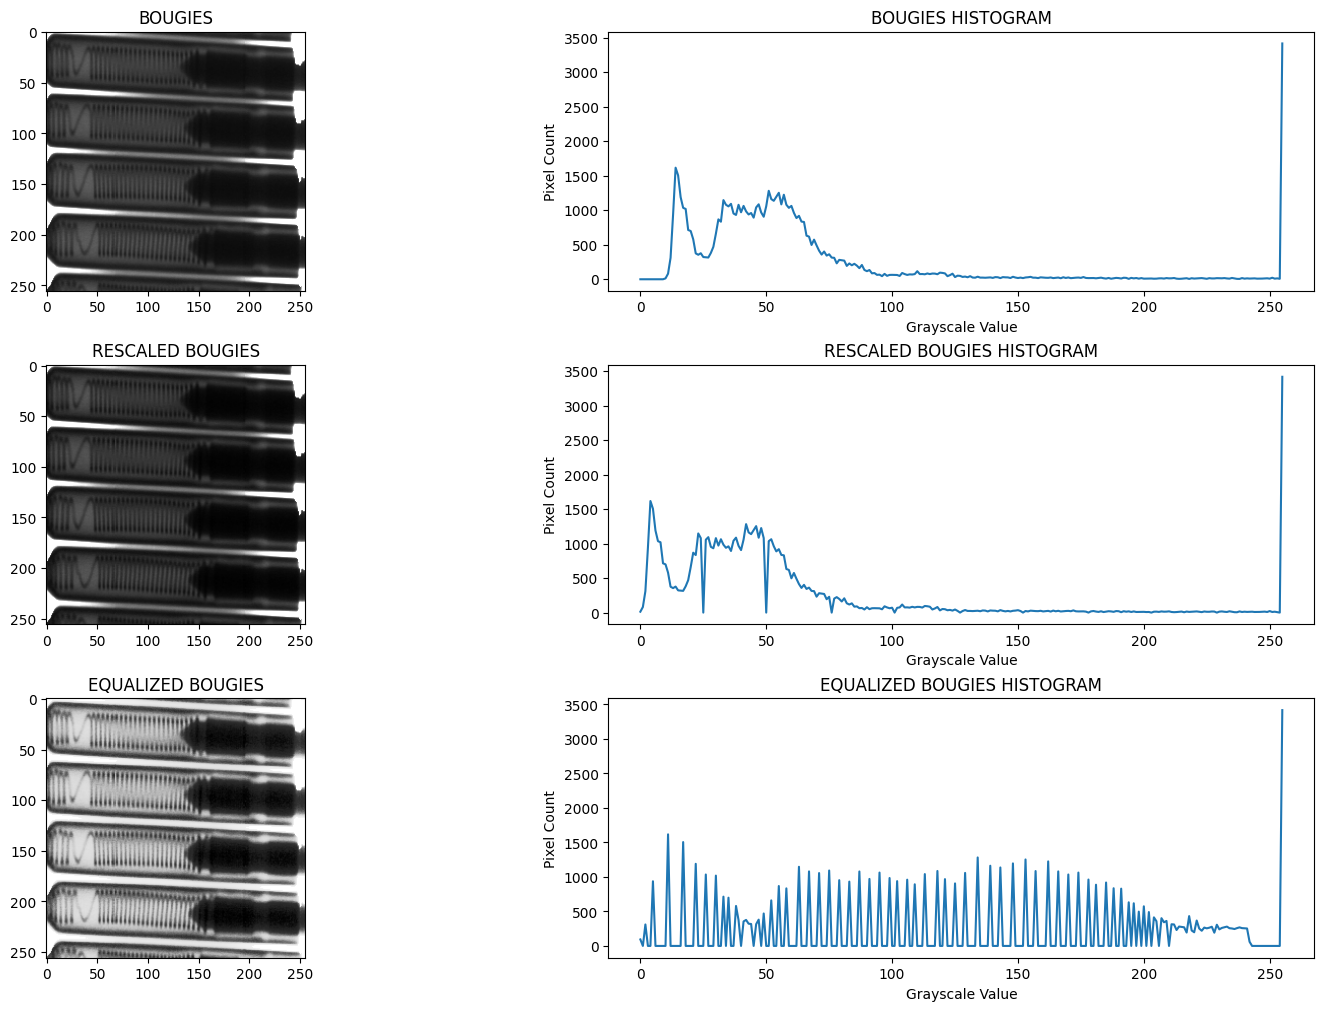

In [85]:
fig, ax = plt.subplots(3, 2, layout = "constrained", figsize = (15, 10))

ax[0, 0].imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0, 0].set_title("BOUGIES")

ax[0, 1].plot(hist_bougies)
ax[0, 1].set_title("BOUGIES HISTOGRAM")
ax[0, 1].set_xlabel("Grayscale Value")
ax[0, 1].set_ylabel("Pixel Count")

ax[1, 0].imshow(rescaled_bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[1, 0].set_title("RESCALED BOUGIES")

ax[1, 1].plot(hist_bougies_rescaled)
ax[1, 1].set_title("RESCALED BOUGIES HISTOGRAM")
ax[1, 1].set_xlabel("Grayscale Value")
ax[1, 1].set_ylabel("Pixel Count")

ax[2, 0].imshow(equalized_bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[2, 0].set_title("EQUALIZED BOUGIES")

ax[2, 1].plot(hist_equalized_bougies)
ax[2, 1].set_title("EQUALIZED BOUGIES HISTOGRAM")
ax[2, 1].set_xlabel("Grayscale Value")
ax[2, 1].set_ylabel("Pixel Count")

plt.show()

## Comente sus observaciones tras aplicar ecualización de histograma a esta imagen. 

Al aplicar la ecualización del histograma sobre la imagen original se observa un aumento marcado del contraste global, lo que permite resaltar detalles internos de las bujías que no eran claramente visibles en la imagen original ni en la imagen con expansión del contraste. Este efecto se debe a la redistribución no lineal de los niveles de gris, que fuerza una ocupación más uniforme del rango dinámico disponible. El histograma de la imagen ecualizada muestra una distribución mucho más extendida a lo largo de los niveles de gris, con múltiples picos característicos de la cuantización. A diferencia del histograma original y del reescalado, donde existe una alta concentración en ciertos rangos de intensidad, la ecualización reduce estas acumulaciones y mejora el aprovechamiento del rango dinámico.

En comparación, la expansión del contraste produce una mejora más suave y controlada, preservando la forma general del histograma original y manteniendo las relaciones relativas entre intensidades. Visualmente, este método ofrece una imagen más fiel, mientras que la ecualización proporciona un contraste más agresivo que resalta detalles, pero puede amplificar ruido y generar transiciones menos naturales.

In [86]:
log_bougies_image = (46 * np.log(1 + np.float64(bougies_image))).astype(np.uint8)
hist_log_bougies = cv2.calcHist([log_bougies_image], [0], None, [256], [0, 256])

In [87]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(log_bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("LOG BOUGIES")

ax[1].plot(hist_log_bougies)
ax[1].set_title("LOG BOUGIES HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Por qué es necesario multiplicar la imagen de salida por un factor?

La transformación logarítmica con multiplicación por 46 produce una imagen con apariencia más clara y suave, donde los detalles en las zonas oscuras de las bujías se vuelven mucho más visibles. El histograma resultante muestra una concentración pronunciada en valores medios-altos (150-200) con el pico de 255 reducido drásticamente. En lo que respecta a la multiplicación por una constantes, es necesario multiplicar por un factor constante porque la transformación logarítmica log(1 + x) comprime el rango de salida. Para valores de entrada 0-255, log(1 + 255) ≈ 5.5, muy por debajo del rango deseado de 0-255. El factor 46 escala el resultado para utilizar el espectro completo: 46 * 5.5 ≈ 253, aproximándose a 255.

## ¿Cómo es el histograma resultado?

El histograma muestra una redistribución significativa hacia valores más altos, con mayor concentración en el rango 150-255 y reducción del pico en blanco puro. La transformación logarítmica comprime las intensidades altas (fondo blanco) mientras expande las bajas (bujías oscuras), invirtiendo la distribución original y revelando detalles previamente ocultos en las sombras.

In [88]:
N, M = bougies_image.shape
L = 256

mean = L / 2
std_dev = 30

x = np.arange(L)

In [89]:
hist_1 = np.exp(-((x - 70) / 10) ** 2) + 0.5 * np.exp(-((x - 180) / 20) ** 2)
hist_1 = hist_1 / hist_1.sum()

cdf_1 = np.cumsum(hist_1)
cdf_1 = cdf_1 / cdf_1[-1]

pixel_values = np.interp(np.random.rand(N * M), cdf_1, np.arange(0, L))
i_to_match_1 = pixel_values.reshape((N, M)).astype(np.uint8)

matched_img_1 = exposure.match_histograms(bougies_image, i_to_match_1).astype(np.uint8)
hist_matched_1 = cv2.calcHist([matched_img_1], [0], None, [256], [0, 256])


In [90]:
hist_2 = norm.pdf(x, loc = mean, scale = std_dev)
hist_2 = hist_2 / hist_2.sum()

cdf_2 = np.cumsum(hist_2)
cdf_2 = cdf_2 / cdf_2[-1]

pixel_values_2 = np.interp(np.random.rand(N * M), cdf_2, np.arange(0, L))
i_to_match_2 = pixel_values_2.reshape((N, M)).astype(np.uint8)

matched_img_2 = exposure.match_histograms(bougies_image, i_to_match_2).astype(np.uint8)
hist_matched_2 = cv2.calcHist([matched_img_2], [0], None, [256], [0, 256])

In [91]:
fig, ax = plt.subplots(2, 3, layout = "constrained", figsize = (10,5))

ax[0,0].plot(hist_1)
ax[0,0].set_title("BIMODAL DISTRIBUTION")

ax[0,1].imshow(matched_img_1, cmap = "gray", vmin = 0, vmax = 255)
ax[0,1].set_title("TRANSFORMATION 1")

ax[0,2].plot(hist_matched_1)
ax[0,2].set_title("TRANSFORMATION 1 HISTOGRAM")
ax[0,2].set_ylabel("Pixel Count")
ax[0,2].set_xlabel("Grayscale Value")

ax[1,0].plot(hist_2)
ax[1,0].set_title("NORMAL DISTRIBUTION")

ax[1,1].imshow(matched_img_2, cmap = "gray", vmin = 0, vmax = 255)
ax[1,1].set_title("TRANSFORMATION 2")

ax[1,2].plot(hist_matched_2)
ax[1,2].set_title("TRANSFORMATION 2 HISTOGRAM")
ax[1,2].set_ylabel("Pixel Count")
ax[1,2].set_xlabel("Grayscale Value")

plt.show()

## Comente sus observaciones tras aplicar la especificaciones de histogramas a esta imagen.

La especificación de histogramas permite moldear la distribución de intensidades según una forma deseada. La transformación 1 (distribución bimodal con picos en 70 y 180) genera una imagen con separación clara entre zonas oscuras y claras, mientras que la transformación 2 (distribución normal centrada) produce una imagen con tonos más concentrados en valores medios. Los histogramas obtenidos aproximan razonablemente las distribuciones esperadas, aunque presentan irregularidades debido a la estructura original de la imagen.

A diferencia del rescaling que preserva relaciones lineales, la ecualización que busca uniformidad, y la logarítmica que favorece sombras, la especificación de histogramas ofrece control completo sobre la forma final de la distribución. La transformación bimodal crea contraste artificial definido, útil para segmentación, mientras que la normal suaviza la imagen hacia tonos medios. Los histogramas obtenidos no coinciden perfectamente con los esperados debido a restricciones de la imagen original, pero capturan sus características principales. Esta técnica es la más flexible pero requiere conocimiento previo del histograma objetivo deseado.

## ¿Qué impactos tiene cada una de las transformaciones?

Las transformaciones analizadas tienen impactos diferenciados según las características de la imagen original. El rescaling lineal resulta efectivo para imágenes que no utilizan el rango dinámico completo, preservando relaciones proporcionales entre intensidades, pero es inútil cuando el rango ya está saturado como en las bujías. La ecualización del histograma sobresale en imágenes con distribuciones concentradas, redistribuyendo píxeles para maximizar el uso del espectro disponible, aunque puede introducir artefactos en imágenes con histogramas muy irregulares. La transformación logarítmica es particularmente valiosa para imágenes con alto rango dinámico donde se requiere visualizar simultáneamente detalles en sombras y luces, comprimiendo valores altos y expandiendo bajos de forma no lineal. La especificación de histogramas ofrece la mayor flexibilidad, permitiendo moldear la distribución según necesidades específicas de procesamiento posterior.


## ¿Cómo  pueden ser usadas en el ámbito de mejoramiento de la calidad de la imagen?

En el ámbito del mejoramiento de calidad, cada técnica tiene su nicho: rescaling para normalización básica de imágenes mal expuestas, ecualización para realzar detalles en imágenes médicas o satelitales con bajo contraste, transformación logarítmica para visualización de imágenes astronómicas o de alto rango dinámico, y especificación de histogramas para tareas especializadas como estandarización de dataset de entrenamiento o pre-procesamiento para segmentación. La selección apropiada depende del histograma original y del objetivo final del procesamiento.


# **4. Umbralización simple**

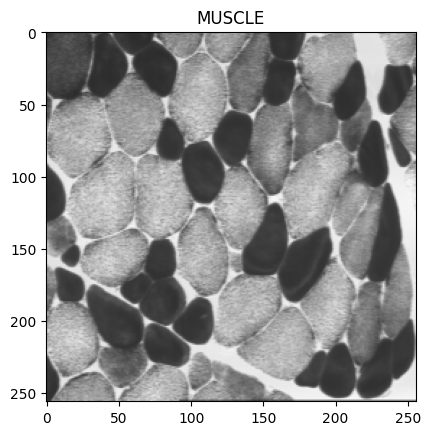

In [92]:
muscle_image = cv2.imread("../images/muscle.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(muscle_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("MUSCLE")

plt.show()

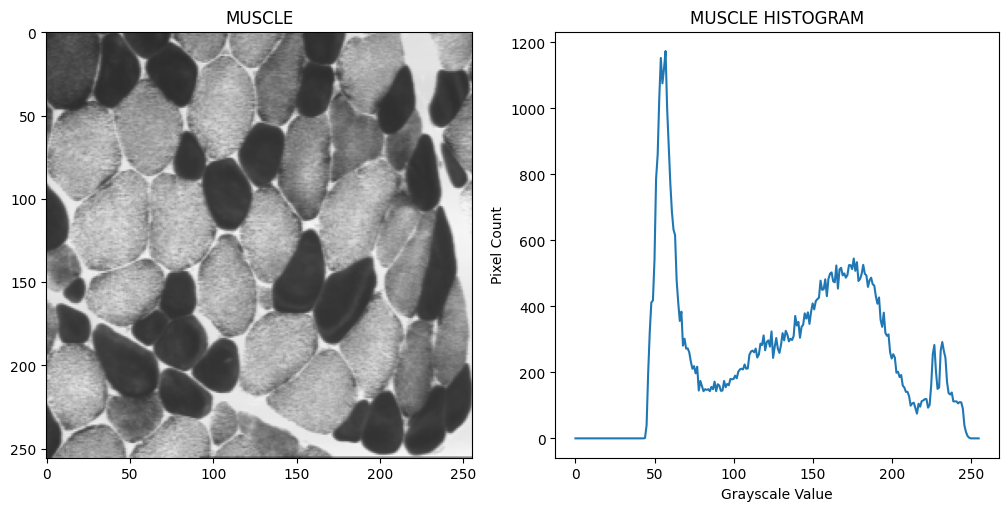

In [93]:
hist_muscle = cv2.calcHist([muscle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("MUSCLE")

ax[1].plot(hist_muscle)
ax[1].set_title("MUSCLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Cuál es el valor que permite separar las fibras oscuras?

Dado el histograma, el valor **S** seleccionado será de **85**, ya que corresponde al valle entre los dos picos de la distribución bimodal observada. El primer pico, centrado alrededor de 50-60, representa las fibras musculares oscuras que ocupan la región de bajas intensidades del espectro y son bastante numerosas en la imagen. El segundo pico, centrado alrededor de 150-180, corresponde al tejido intersticial claro entre las fibras. El valor S = 85 se encuentra en el punto mínimo entre ambas poblaciones, lo que lo convierte en el umbral óptimo para separar las fibras oscuras del resto de la imagen.

In [114]:
S = 85

min_value = S
max_value = S + 1

In [115]:
rescaled_muscle_image = exposure.rescale_intensity(muscle_image, in_range = (min_value, max_value), out_range = (0, 255)).astype("uint8")

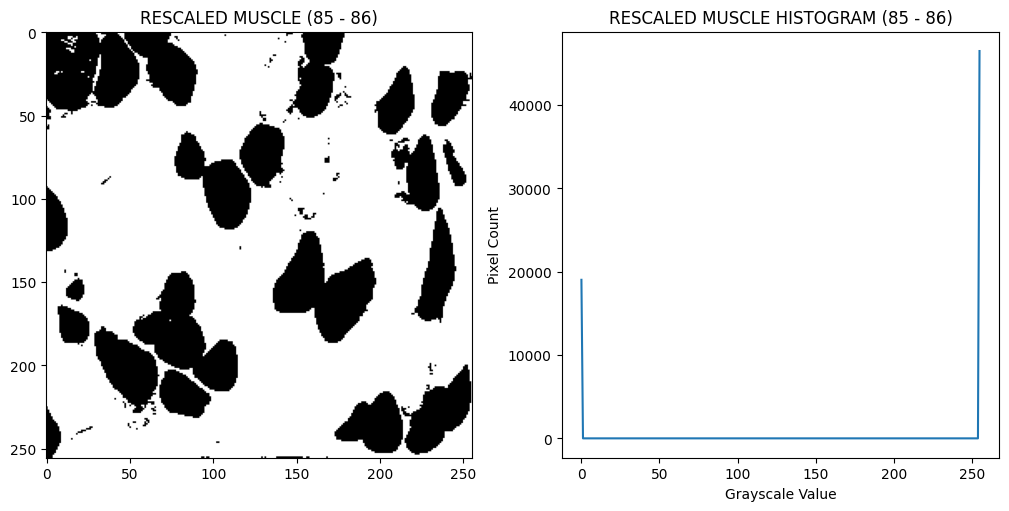

In [117]:
hist_muscle_rescaled = cv2.calcHist([rescaled_muscle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(rescaled_muscle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title(f"RESCALED MUSCLE ({min_value} - {max_value})")

ax[1].plot(hist_muscle_rescaled)
ax[1].set_title(f"RESCALED MUSCLE HISTOGRAM ({min_value} - {max_value})")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Cuál es su conclusión tras efectuar la calibración del histograma?

Al aplicar rescaling con el rango restrictivo (85, 86), la imagen resultante se vuelve prácticamente binaria, mostrando únicamente dos valores de intensidad: 0 (negro) para píxeles originalmente menores o iguales a 85, y 255 (blanco) para píxeles mayores a 86. 

El histograma resultante confirma esta binarización extrema con dos picos pronunciados en los extremos del espectro. Este comportamiento se debe a que al mapear un rango de entrada extremadamente pequeño al rango completo de salida posible [0, 255], cualquier píxel fuera de este rango mínimo se satura en los extremos, funcionando efectivamente como una operación de umbralización binaria con umbral en S. La segmentación resultante separa de manera bastante satisfactoria las fibras musculares oscuras del resto de tejido, demostrando que el valor S fue seleccionado apropiadamente en el valle del histograma bimodal.

In [118]:
thres_value, thres_muscle_image = cv2.threshold(muscle_image, S, 255, cv2.THRESH_BINARY)
hist_muscle_thres = cv2.calcHist([thres_muscle_image], [0], None, [256], [0, 256])

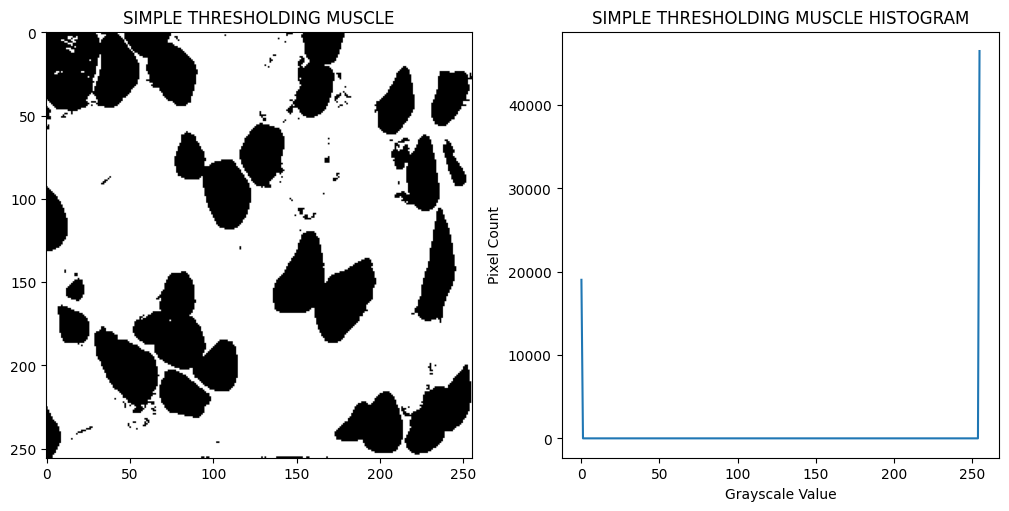

In [119]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(thres_muscle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("SIMPLE THRESHOLDING MUSCLE")

ax[1].plot(hist_muscle_thres)
ax[1].set_title("SIMPLE THRESHOLDING MUSCLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Cuál es su conclusión tras usar la función de umbralización simple?

La umbralización simple produce un resultado idéntico al que se encontró al utilizar una calibración del histograma con el rango (85, 86), confirmando que ambas operaciones son equivalentes para este caso.

In [124]:
otsu_value, otsu_muscle_image = cv2.threshold(muscle_image, S, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
hist_muscle_otsu = cv2.calcHist([otsu_muscle_image], [0], None, [256], [0, 256])
print(f"Umbral calculado por Otsu: {otsu_value}")

Umbral calculado por Otsu: 125.0


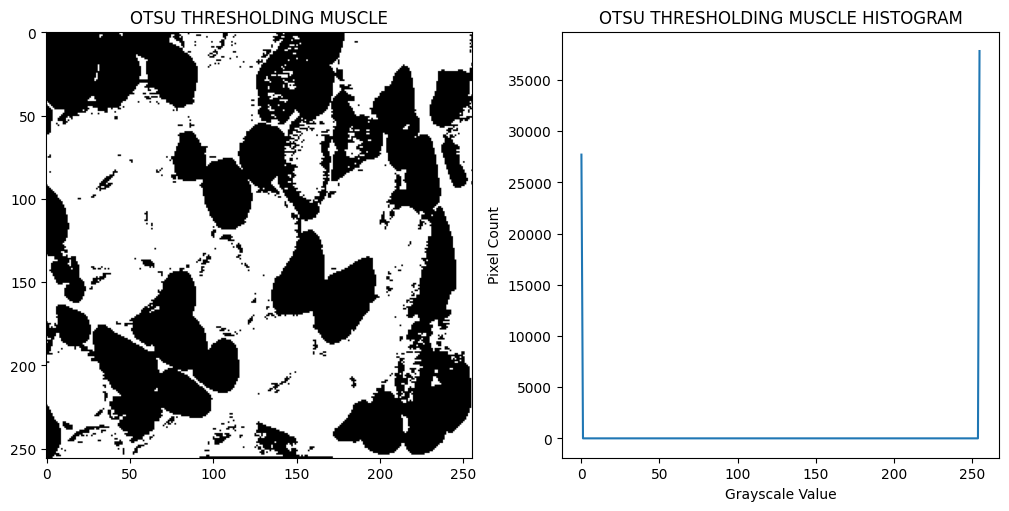

In [125]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(otsu_muscle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("OTSU THRESHOLDING MUSCLE")

ax[1].plot(hist_muscle_otsu)
ax[1].set_title("OTSU THRESHOLDING MUSCLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

## ¿Qué resultado dan los métodos de umbralización automática (Otsu)?

El método de Otsu produce una segmentación menos precisa comparada con la umbralización manual usando S = 85. La imagen resultante muestra mayor cantidad de ruido, con píxeles negros dispersos en regiones que no corresponden a fibras musculares oscuras. Esto se debe a que el umbral calculado automáticamente por Otsu fue de **125.0**, significativamente mayor que el valor óptimo S = 85 identificado visualmente en el valle del histograma bimodal. Esta diferencia de 40 unidades causa que píxeles con intensidades entre 85-125, que pertenecen al tejido claro, sean incorrectamente clasificados como fibras oscuras. El histograma de la imagen umbralizada con Otsu mantiene la estructura binaria con picos en 0 y 255, pero la proporción de píxeles en cada clase difiere notablemente de la segmentación manual.

## ¿Cómo eligen estos métodos el umbral a aplicar?

El método de Otsu selecciona el umbral óptimo minimizando la varianza intra-clase o equivalentemente maximizando la varianza inter-clase. El algoritmo evalúa todos los posibles umbrales del 0 al 255, y para cada uno calcula la varianza ponderada de las dos clases resultantes, es decir, los píxeles por debajo y por encima del umbral. El umbral que produce la menor varianza dentro de cada clase y la mayor separación entre clases es seleccionado como óptimo. Este método asume una distribución bimodal del histograma y funciona mejor cuando ambas clases tienen poblaciones similares y separación clara.

# **5. Umbralización doble**

In [128]:
rondelle_image = cv2.imread("../images/rondelle.png", cv2.IMREAD_GRAYSCALE)
angio_image = cv2.imread("../images/angio.png", cv2.IMREAD_GRAYSCALE)

In [129]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(rondelle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("RONDELLE")

ax[1].imshow(angio_image, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_title("ANGIO")

plt.show()

In [ ]:
def three_class_threshold(image, lower, upper):
    
    """
    Create a three-class segmentation (0, 128, 255).

    Parameters
    ----------
    image : numpy.ndarray
        Grayscale input image.
    lower : int
        Lower threshold for the medium class (inclusive).
    upper : intS
        Upper threshold for the medium class (exclusive). Values >= upper
        are assigned to the high class.

    Returns
    -------
    numpy.ndarray
        Output image with three classes encoded as 0 (low), 128 (medium),
        and 255 (high).
    """
    
    result = np.zeros_like(image)
    
    mask_medium = cv2.inRange(image, lower, upper - 1)
    result[mask_medium == 255] = 128
    
    _, mask_high = cv2.threshold(image, upper - 1, 255, cv2.THRESH_BINARY)
    result[mask_high == 255] = 255
    
    
    return result

Se define la función three_class_threshold() que aplica umbralización doble a una imagen dada, utilizando los valores de umbral inferior y superior especificados. Como se puede ver en el docstring de la función, los rangos se asumieron de la siguiente manera:

- Píxeles en 0: $[0, \text{umbral\_inferior})$
- Píxeles en 128: $[\text{umbral\_inferior}, \text{umbral\_superior})$
- Píxeles en 255: $[\text{umbral\_superior}, 255]$

In [131]:
double_rondelle = three_class_threshold(rondelle_image, 70, 140)
hist_double_rondelle = cv2.calcHist([double_rondelle], [0], None, [256], [0, 256])

In [132]:
double_angio = three_class_threshold(angio_image, 70, 140)
hist_double_angio = cv2.calcHist([double_angio], [0], None, [256], [0, 256])

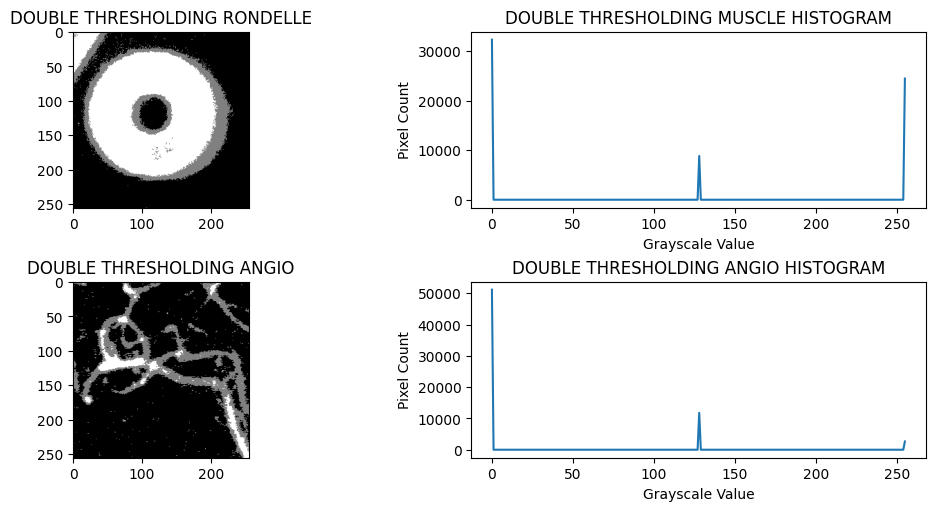

In [133]:
fig, ax = plt.subplots(2, 2, layout = "constrained", figsize=(10,5))

ax[0,0].imshow(double_rondelle, cmap = "gray", vmin = 0, vmax = 255)
ax[0,0].set_title("DOUBLE THRESHOLDING RONDELLE")

ax[0,1].plot(hist_double_rondelle)
ax[0,1].set_ylabel("Pixel Count")
ax[0,1].set_xlabel("Grayscale Value")
ax[0,1].set_title("DOUBLE THRESHOLDING MUSCLE HISTOGRAM")

ax[1,0].imshow(double_angio, cmap = "gray", vmin = 0, vmax = 255)
ax[1,0].set_title("DOUBLE THRESHOLDING ANGIO")

ax[1,1].plot(hist_double_angio)
ax[1,1].set_ylabel("Pixel Count")
ax[1,1].set_xlabel("Grayscale Value")
ax[1,1].set_title("DOUBLE THRESHOLDING ANGIO HISTOGRAM")

plt.show()

## Deduzca de estos ejemplos el rol y las condiciones de utilización de la umbralización doble.

La umbralización doble permite segmentar imágenes en tres clases según rangos de intensidad, preservando información de regiones intermedias que se perderían con umbralización simple al convertirlo todo en básicamente 0 o 255. Su rol principal es identificar zonas de transición o bordes donde las intensidades no son claramente altas ni bajas, asignándolas a una clase intermedia. Las condiciones ideales de utilización son imágenes con distribución trimodal o donde existe una zona de gradiente significativa entre objetos y fondo, como en imágenes médicas con tejidos de contraste intermedio o imágenes industriales con múltiples materiales.

## ¿Cómo es el comportamiento (ventajas y desventajas) con respecto a: conectividad, extracción de objetos de formas complejas o ramificadas y calidad de los contornos o fronteras de los objetos extraídos?

**Conectividad:** El impacto en conectividad depende de la naturaleza de la imagen. En *angio.png*, los vasos sanguíneos principales preservan su conectividad razonablemente bien, con la clase intermedia apareciendo principalmente en bordes y ramificaciones finas. Sin embargo, estructuras delgadas o débilmente contrastadas pueden fragmentarse si sus intensidades caen en el rango medio. La ventaja sobre umbralización simple es que permite distinguir entre estructuras de alto contraste (clase alta) y estructuras de contraste moderado (clase media), aunque con el riesgo de desconexión en zonas de transición.

**Extracción de objetos complejos o ramificados:** Los resultados muestran que la umbralización doble puede manejar estructuras ramificadas mejor de lo esperado si las ramificaciones principales tienen contraste suficiente para permanecer en la clase alta. En *angio.png*, la red vascular principal se preserva, aunque ramificaciones secundarias y zonas de menor contraste pueden perderse o clasificarse como clase intermedia. La técnica es más efectiva cuando los objetos de interés tienen intensidades consistentemente por encima del umbral superior, reservando la clase media para elementos secundarios o bordes.

**Calidad de contornos:** La clase intermedia genera una representación de bordes más rica que la umbralización simple. En *rondelle.png*, la zona gris captura la transición física real entre regiones, mientras que en *angio.png* representa gradientes en los bordes de vasos. Esto puede considerarse ventaja cuando la zona intermedia contiene información relevante (como en *rondelle.png*, donde el anillo tiene esa intensidad realmente), o desventaja cuando solo representa artefactos de gradiente que oscurecen los límites precisos del objeto. Para análisis morfológico cuantitativo como por ejemplo segmentación entre tumores renales y el propio riñón, la umbralización simple proporciona contornos más definidos, pero la doble ofrece información adicional sobre la estructura de intensidad que puede ser valiosa para caracterización de objetos.

# **6. Ejercicio de síntesis**

## Ejercicio 1

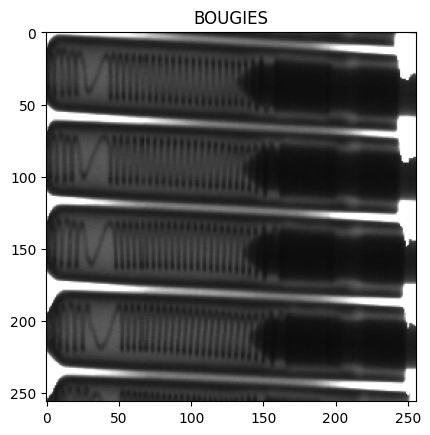

In [ ]:
bougies_image = cv2.imread("../images/bougies.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("BOUGIES")

plt.show()

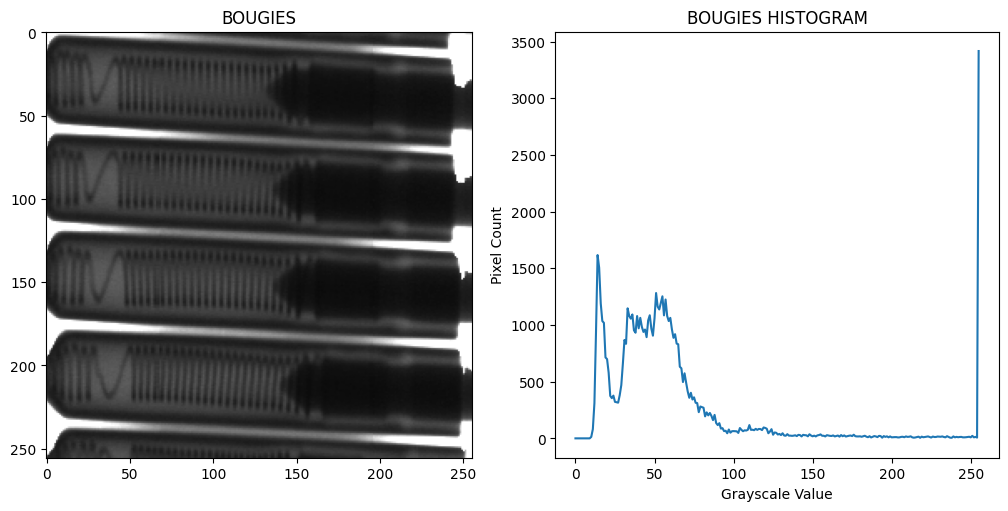

In [ ]:
hist_bougies = cv2.calcHist([bougies_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(bougies_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("BOUGIES")

ax[1].plot(hist_bougies)
ax[1].set_title("BOUGIES HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

In [ ]:
lower_bound = 100
upper_bound = 255

mask = cv2.inRange(bougies_image, lower_bound, upper_bound)
mask = cv2.bitwise_not(mask)

masked_bougies = cv2.bitwise_and(bougies_image, bougies_image, mask = mask)

In [ ]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(mask, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("MASK")

ax[1].imshow(masked_bougies, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_title("MASKED BOUGIES")

plt.show()

In [107]:
equalized_masked_bougies = cv2.equalizeHist(masked_bougies)

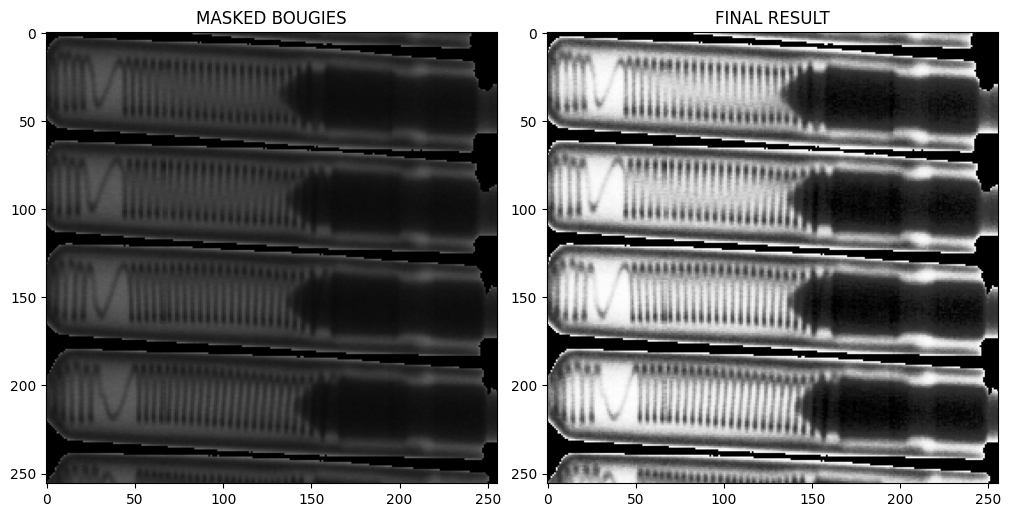

In [ ]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(masked_bougies, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("MASKED BOUGIES")

ax[1].imshow(equalized_masked_bougies, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_title("FINAL RESULT")

plt.show()

Se buscaba reproducir el resultado mostrado en la imagen objetivo, donde las bujías presentan contraste mejorado y detalles visibles en las zonas oscuras. Para lograr esto, se implementó una estrategia de enmascaramiento selectivo previo a la ecualización del histograma. Primero, se creó una máscara utilizando `cv2.inRange()` para identificar píxeles con intensidades entre 100 y 255 correspondientes al fondo claro. Esta máscara se invirtió mediante `cv2.bitwise_not()` para seleccionar únicamente las regiones oscuras de las bujías (intensidades menores a 100). Se aplicó `cv2.bitwise_and()` para extraer solo las bujías, estableciendo el fondo en negro y eliminando la influencia del pico masivo en 255 que dominaba el histograma original. Finalmente, la ecualización del histograma se aplicó exclusivamente sobre las regiones enmascaradas, permitiendo que la redistribución de intensidades se concentrara en el rango de valores de las bujías. El resultado obtenido reproduce exitosamente la imagen objetivo, con mejora significativa del contraste interno de las bujías y revelación de detalles estructurales que eran imperceptibles en la imagen original.

## Ejercicio 2

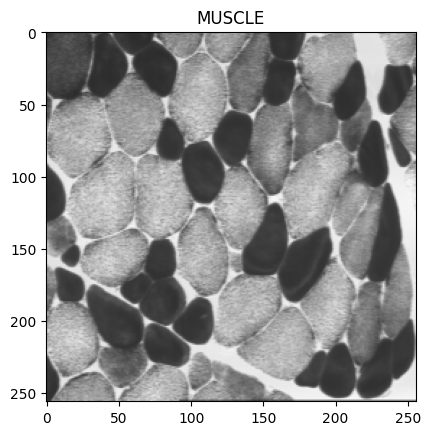

In [ ]:
muscle_image = cv2.imread("../images/muscle.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(muscle_image, cmap = "gray", vmin = 0, vmax = 255)
plt.title("MUSCLE")

plt.show()

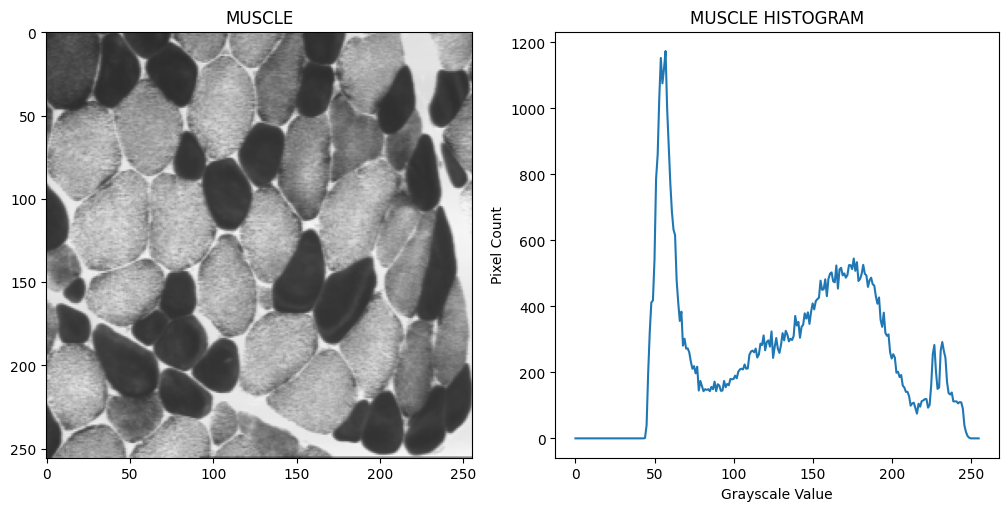

In [ ]:
hist_muscle = cv2.calcHist([muscle_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(muscle_image, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("MUSCLE")

ax[1].plot(hist_muscle)
ax[1].set_title("MUSCLE HISTOGRAM")
ax[1].set_xlabel("Grayscale Value")
ax[1].set_ylabel("Pixel Count")

plt.show()

In [111]:
lower_bound = 40
upper_bound = 87

mask = cv2.inRange(muscle_image, lower_bound, upper_bound)

masked_image = cv2.bitwise_and(muscle_image, muscle_image, mask = mask)

In [ ]:
fig, ax = plt.subplots(1, 2, layout = "constrained", figsize = (10, 5))

ax[0].imshow(mask, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("MASK")

ax[1].imshow(masked_image, cmap = "gray")
ax[1].set_title("MASKED MUSCLE")

plt.show()

In [114]:
muscle_or_mask = cv2.bitwise_or(muscle_image, mask)

In [ ]:
plt.imshow(muscle_or_mask, cmap = "gray")
plt.title("FINAL RESULT")

plt.show()